In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def hypothesis(x, theta):
    '''calculates the hypothesis function'''
    return np.matmul(x, theta)

In [3]:
def compute_cost(x, y, theta):
    '''outputs the cost function'''
    m = len(y)
    error = hypothesis(x, theta) - y
    error_square_summed = np.matmul(np.transpose(error), error)
    return 1/(2*m)*error_square_summed

In [4]:
def gradient_descent(x, y, theta, alpha, num_iter):
    '''Performs Gradient Descent and outputs minimized theta and history of cost_functions'''
    m = len(y)
    J_history = np.zeros((num_iter, 1))

    for iter in range(num_iter):
        h = hypothesis(x, theta)
        error = h-y
        partial_derivative = 1/m * np.matmul(np.transpose(x), error)
        theta = theta - alpha*partial_derivative

        J_history[iter] = compute_cost(x, y, theta)

    return theta, J_history

In [5]:
def predict(value, theta):
    x_array = [1, value]
    return np.matmul(x_array, theta)

Plotting Data ...



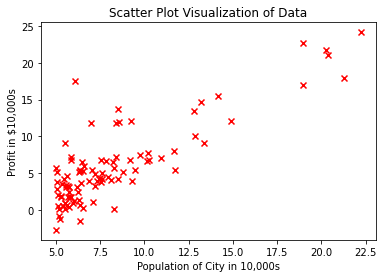

Testing the cost function ...
with theta = [[0],[0]] 
Cost computed = [[32.07273388]]
Expected cost value (approx) 32.07

with theta = [[-1],[2]] 
Cost computed = [[54.24245508]]
Expected cost value (approx) 54.24

Running Gradient Descent ...

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
  3.6303
  1.1664

For population = 35,000, we predict a profit of [4519.7678677]
For population = 70,000, we predict a profit of [45342.45012945]


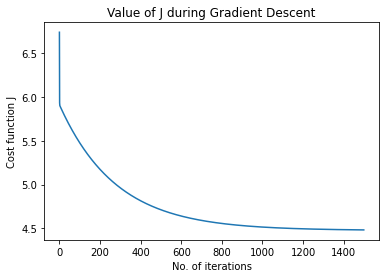

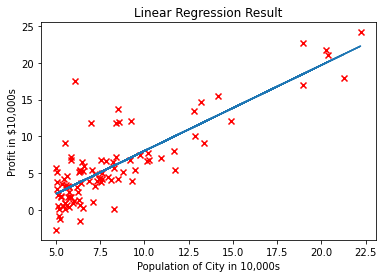

In [6]:
data_path = "./ex1data1.txt"
data = np.loadtxt(data_path, delimiter=',')

# first value is independent variable x, second is dependant y
independent_x = data[:, 0]
dependant_y = data[:, 1]

# showing data
print("Plotting Data ...\n")
plt.figure("Scatter Plot Visualization of Data")
plt.title("Scatter Plot Visualization of Data")
plt.scatter(independent_x, dependant_y, marker="x", c="r")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show(block=False)

# as we are going to use matrix multiplication, we need x as first column 1, second column values
dataset_size = independent_x.shape[0]
ones = np.ones(dataset_size)
x = np.stack((ones, independent_x), axis=1)

# also converting y in vector form to matrix form
y = dependant_y.reshape(len(dependant_y), 1)

# initializing theta
theta = np.zeros((2, 1))
alpha = 0.01
num_iter = 1500

print("Testing the cost function ...")
print(f"with theta = [[0],[0]] \nCost computed = {compute_cost(x,y,theta)}")
print("Expected cost value (approx) 32.07\n")

print(
    f"with theta = [[-1],[2]] \nCost computed = {compute_cost(x,y,[[-1],[2]])}")
print("Expected cost value (approx) 54.24\n")

print("Running Gradient Descent ...\n")
minimized_theta, J_history = gradient_descent(x, y, theta, alpha, num_iter)

plt.figure("Value of J during Gradient Descent")
plt.title('Value of J during Gradient Descent')
x_axis = range(len(J_history))
plt.xlabel('No. of iterations')
plt.ylabel("Cost function J")
plt.plot(x_axis,J_history)

print("Theta found by gradient descent:")
print(minimized_theta)
print("Expected theta values (approx)")
print("  3.6303\n  1.1664\n")

print(
    f"For population = 35,000, we predict a profit of {predict(3.5, minimized_theta)*10000}")
print(
    f"For population = 70,000, we predict a profit of {predict(7, minimized_theta)*10000}")

plt.figure("Linear Regression Result")
plt.title("Linear Regression Result")
plt.scatter(independent_x, dependant_y, marker="x", c="r")
plt.plot(x[:, 1], hypothesis(x, minimized_theta))
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

#end